### This Notebook is not included in the manuscript!

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import re

##### Define basic parameters

In [4]:
year_range = [f'{i}_{i+2}' for i in range(1990,2020,3)]

year_name = [f'Landsat_{year}' for year in year_range[:-2]] + [f'Sentinel_{year}' for year in year_range[-2:]]

In [5]:
# import the points with image values 
feature_df = [pd.read_csv(f'../Process_1_GEE_Python_Classification/Sub_Process_6_Before_classification_Feature_selection/Data/{name}.csv') for name in year_name]

# merge all pt_with_img and remove unnecessary columns
feature_df = [fe.drop(['system:index','.geo','split'],axis=1) for fe in feature_df]

##### Draw pairplots for the first impression

In [6]:
fe = feature_df[0]

In [13]:
# Train test split
X = fe.drop('Built',1)
y = fe['Built']

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [17]:
# instantiate two classier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

RF  = RandomForestClassifier()
SVM = SVC()

# fit the classifiers
RF.fit(X_train,y_train)
SVM.fit(X_train,y_train)

# predict
RF_pred = RF.predict_proba(X_test)
SVM_pred = SVM.decision_function(X_test)

In [34]:
# plot roc_auc
from sklearn.metrics import roc_curve,auc

RF_fpr,RF_tpr,RF_threshold    = roc_curve(y_test,RF_pred[:,1])
SVM_fpr,SVM_tpr,SVM_threshold = roc_curve(y_test,SVM_pred)

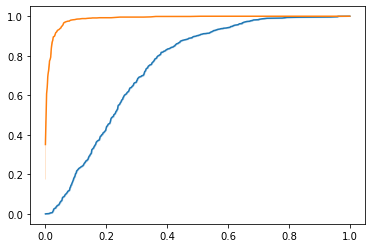

In [35]:
sns.lineplot(SVM_fpr,SVM_tpr)
sns.lineplot(RF_fpr,RF_tpr)